In [2]:
import h5py

import matplotlib.pyplot as plt
import numpy as np

from lr_utils import load_dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x = test_set_x_flatten/255
train_set_x = train_set_x_flatten/255

In [ ]:
for i in range(0,50):
    index=i
    plt.imshow(test_set_x[:,index].reshape((train_set_x_orig.shape[1],train_set_x_orig.shape[1],3)))
    plt.show()

In [3]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s
    

In [4]:
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [5]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    cost=-(np.dot(Y,np.log(A).T)+np.dot(1-Y,np.log(1-A).T))/m
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    grads={"dw":dw,"db":db}
    cost=np.squeeze(cost)
    return grads,cost

In [6]:
def optimize(w,b,X,Y,num_item,learning_rate):
    costs=[]
    for i in range(num_item):
        grads,cost=propagate(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%1000==0:
            costs.append(cost)
            print(cost)
    
    params={'w':w,'b':b}
    grads={'dw':dw,'db':db}
    return params,grads,costs

In [7]:
def prediction(w,b,X):
    m=X.shape[1]
    Y_pred=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0][i]<=0.5:
            A[0][i]=0
        else:
            A[0][i]=1
    Y_pred=A
    return Y_pred
    

In [10]:
def model(X_train,X_test,Y_train,Y_test,num_item=20000,learning_rate=0.005):
    w,b=initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_item,learning_rate)
    w=parameters['w']
    b=parameters['b']
    Y_prediction_test=prediction(w,b,X_test)
    Y_prediction_train=prediction(w,b,X_train)
    print('train accuracy:{}%'.format(100-np.mean(np.abs(Y_prediction_train-train_set_y)*100)))
    print('test accuracy:{}%'.format(100-np.mean(np.abs(Y_prediction_test-test_set_y)*100)))    
    
    d={'costs':costs,
       "Y_prediction_test":Y_prediction_test,
       "Y_prediction_train":Y_prediction_train,
       "w":w,
       "b":b,
       'learning_rate':learning_rate,
       "num_item":num_item
       }
    return d

0.6931471805599453
0.2148195137844964
0.13560807525912016
0.09828023699678214
0.07666171187034185
0.06263144008882937
0.05282432770019416
0.04560088172969223
0.040069430506331674
0.03570434514226789
0.03217611847083888
0.02926793573633382
0.02683144033883118
0.024761787385389915
0.022982844835036747
0.021438036452545012
0.020084470035625072
0.018889055384854907
0.01782586879741676
0.016874321759048974
train accuracy:100.0%
test accuracy:72.0%


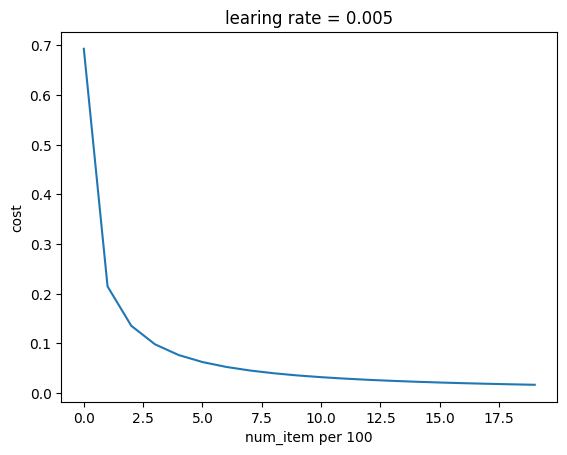

In [11]:
d=model(train_set_x,test_set_x,train_set_y,test_set_y)
costs=np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('num_item per 100')
plt.title("learing rate = "+str(d['learning_rate']))
plt.show()